/tmp/ipykernel_33747/793975323.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax_box.boxplot(


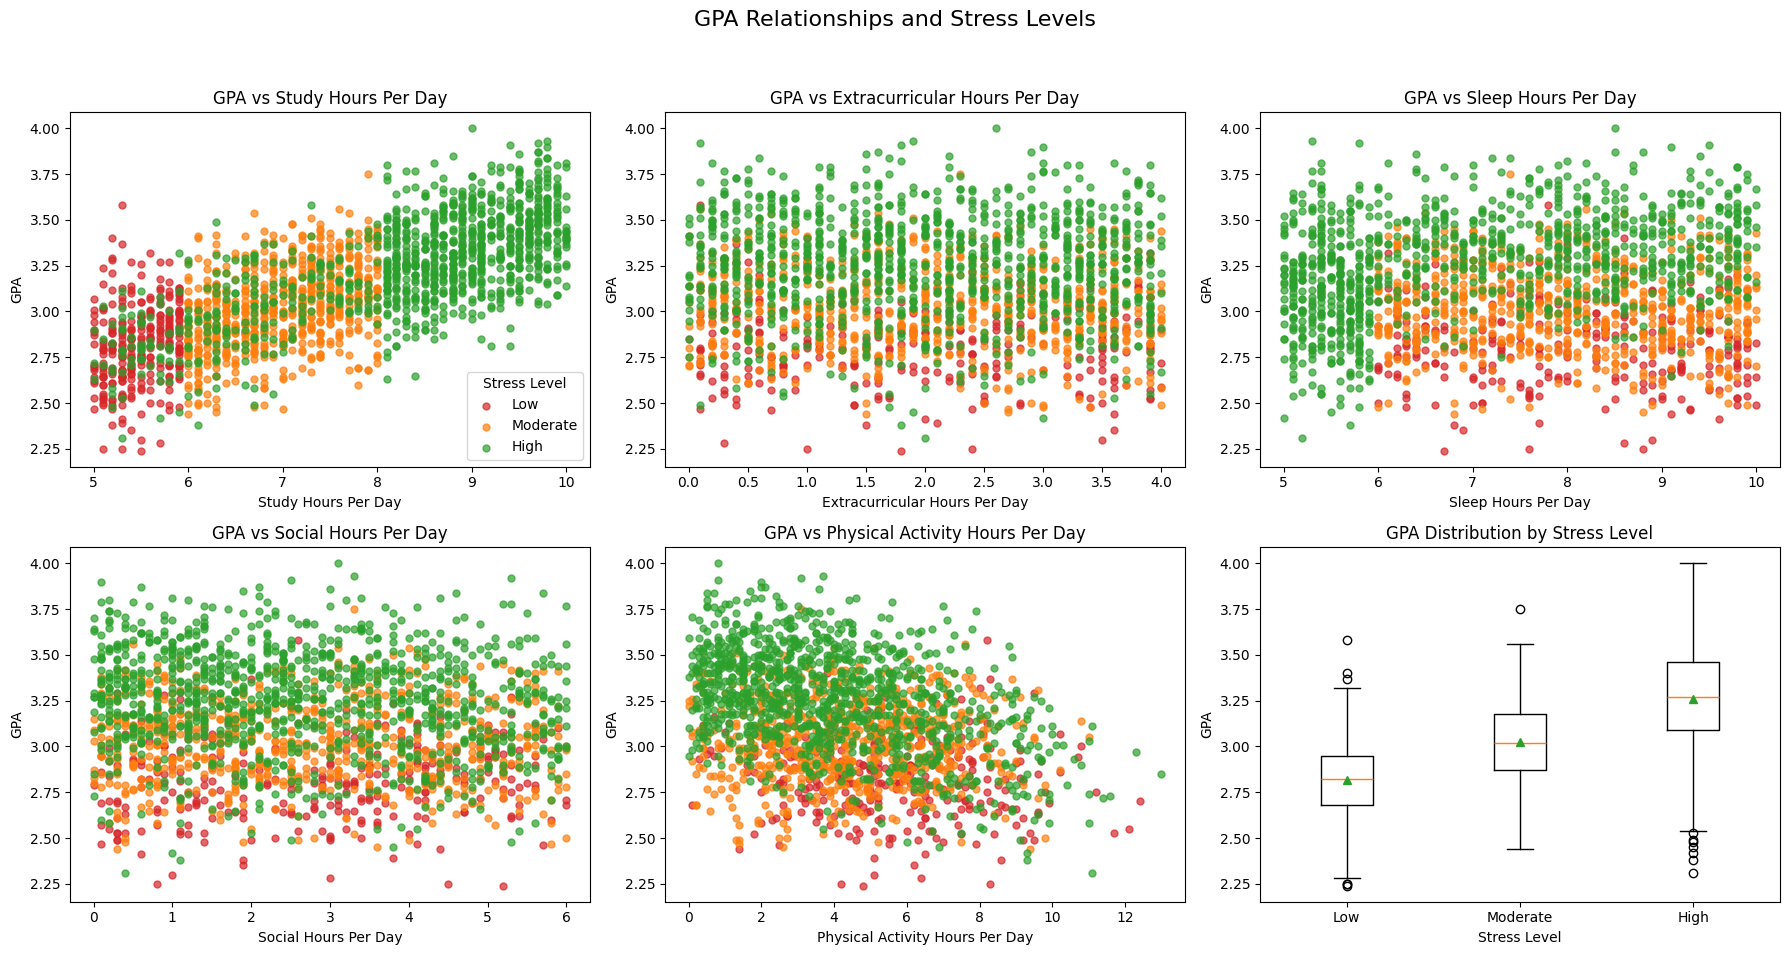

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/student_lifestyle_dataset.csv")

predictors = [
    "Study_Hours_Per_Day",
    "Extracurricular_Hours_Per_Day",
    "Sleep_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Physical_Activity_Hours_Per_Day",
]

stress_colors = {
    "low": "tab:red",
    "moderate": "tab:orange",
    "high": "tab:green",
}

# Create a 2x3 grid of subplots: 5 scatter plots + 1 boxplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # flatten to 1D array for easy indexing

# Scatter plots: GPA vs each predictor
for i, col in enumerate(predictors):
    ax = axes[i]
    for level, color in stress_colors.items():
        mask = df["Stress_Level"].str.lower() == level
        subset = df[mask]

        ax.scatter(
            subset[col],
            subset["GPA"],
            label=level.capitalize(),
            alpha=0.7,
            s=25,
            c=color,
        )

    ax.set_xlabel(col.replace("_", " "))
    ax.set_ylabel("GPA")
    ax.set_title(f"GPA vs {col.replace('_', ' ')}")

    # Only show legend on the first subplot to avoid clutter
    if i == 0:
        ax.legend(title="Stress Level")

# Boxplot of GPA by stress level in the last subplot
ax_box = axes[-1]
order = ["low", "moderate", "high"]
data_to_plot = [
    df[df["Stress_Level"].str.lower() == lvl]["GPA"].dropna()
    for lvl in order
]

ax_box.boxplot(
    data_to_plot,
    labels=[lvl.capitalize() for lvl in order],
    showmeans=True,
)
ax_box.set_xlabel("Stress Level")
ax_box.set_ylabel("GPA")
ax_box.set_title("GPA Distribution by Stress Level")

# Hide any unused subplots (in case of layout changes)
for j in range(len(predictors) + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("GPA Relationships and Stress Levels", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
